In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! zip -s- "/content/drive/My Drive/DATA-475/plant-seedlings-classification.zip" -O plant-seedlings-classification.zip
! unzip plant-seedlings-classification.zip -d plant-seedlings-classification

Streaming output truncated to the last 5000 lines.
  inflating: plant-seedlings-classification/test/b1cd2a91e.png  
  inflating: plant-seedlings-classification/test/b215531dd.png  
  inflating: plant-seedlings-classification/test/b2706e2b3.png  
  inflating: plant-seedlings-classification/test/b29339405.png  
  inflating: plant-seedlings-classification/test/b30ab4659.png  
  inflating: plant-seedlings-classification/test/b31292706.png  
  inflating: plant-seedlings-classification/test/b341d0aab.png  
  inflating: plant-seedlings-classification/test/b39c71707.png  
  inflating: plant-seedlings-classification/test/b3d6fdb80.png  
  inflating: plant-seedlings-classification/test/b3e08b037.png  
  inflating: plant-seedlings-classification/test/b47691c08.png  
  inflating: plant-seedlings-classification/test/b4c3df835.png  
  inflating: plant-seedlings-classification/test/b4f7c9214.png  
  inflating: plant-seedlings-classification/test/b573b7a56.png  
  inflating: plant-seedlings-classifica

In [ ]:
!pip install fastai==1.0.61 spacy==2.3.7 torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 239 kB 28.9 MB/s 
     |████████████████████████████████| 10.4 MB 49.8 MB/s 
     |█████████████▌                  | 834.1 MB 1.4 MB/s eta 0:13:19tcmalloc: large alloc 1147494400 bytes == 0x3a1c2000 @  0x7f6ec8fbb615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████               | 1055.7 MB 1.2 MB/s eta 0:12:32tcmalloc: large alloc 1434370048 bytes == 0x7e818000 @  0x7f6ec8fbb615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x

In [ ]:
import os
import warnings
warnings.filterwarnings("ignore")

labels = os.listdir("plant-seedlings-classification/train")
print(labels)

['Sugar beet', 'Shepherds Purse', 'Black-grass', 'Fat Hen', 'Common Chickweed', 'Charlock', 'Maize', 'Common wheat', 'Scentless Mayweed', 'Cleavers', 'Loose Silky-bent', 'Small-flowered Cranesbill']


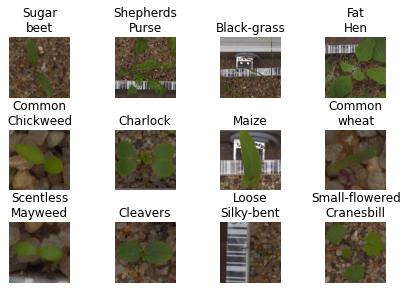

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


fig, axs = plt.subplots(nrows=3, ncols=4)
fig.tight_layout()
for index, label in enumerate(labels):
    image = np.random.choice(os.listdir(f"plant-seedlings-classification/train/{label}"))
    im = Image.open(f"plant-seedlings-classification/train/{label}/{image}")
    ind = int(index/4), index % 4
    axs[ind].imshow(im)
    axs[ind].set_title(label.replace(" ", "\n"))
    axs[ind].axis("off")

In [ ]:
from fastai.vision import *
from fastai.metrics import accuracy

# Use from_folder factory method from ImageDataBunch to create a dataset
# configure: 
#   path
#   size
#   ds_tfms, to flip the image randomly and allow fliping vertically
#   valid_pct， 20%


data = ImageDataBunch.from_folder(
    "/content/plant-seedlings-classification",
    train="train",
    test="test",
    ds_tfms=get_transforms(do_flip=True, flip_vert=True),
    valid_pct=.2,
    size=224,
    bs=64,
)

In [ ]:
# normalize with imagenet_stats
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (3800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sugar beet,Sugar beet,Sugar beet,Sugar beet,Sugar beet
Path: /content/plant-seedlings-classification;

Valid: LabelList (950 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Charlock,Sugar beet,Cleavers,Fat Hen,Scentless Mayweed
Path: /content/plant-seedlings-classification;

Test: LabelList (794 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/plant-seedlings-classification

In [ ]:
# create a CNN learner named "learner" with resnet34
learner = cnn_learner(data, models.resnet34, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-02
Min loss divided by 10: 1.00E-02


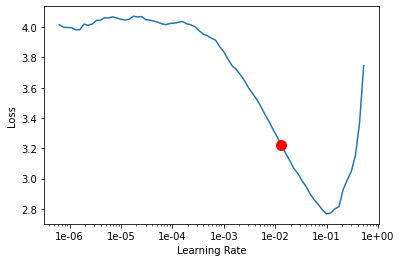

In [ ]:
# find a learning rate
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [ ]:
# fit one cycle
lr = learner.recorder.min_grad_lr
learner.fit_one_cycle(8, lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.559411,0.465496,0.823158,01:31
1,0.813489,0.724876,0.788421,01:26
2,0.654997,1.063726,0.765263,01:29
3,0.524029,0.567705,0.862105,01:28
4,0.420425,0.280216,0.912632,01:32
5,0.296075,0.170918,0.944211,01:27
6,0.219206,0.148484,0.954737,01:30
7,0.182264,0.151926,0.956842,01:29


In [ ]:
# interpret the result and see the most confused classess
interp = ClassificationInterpretation.from_learner(learner)
interp.most_confused(min_val=2)

[('Black-grass', 'Loose Silky-bent', 22),
 ('Loose Silky-bent', 'Black-grass', 5),
 ('Common Chickweed', 'Scentless Mayweed', 2)]

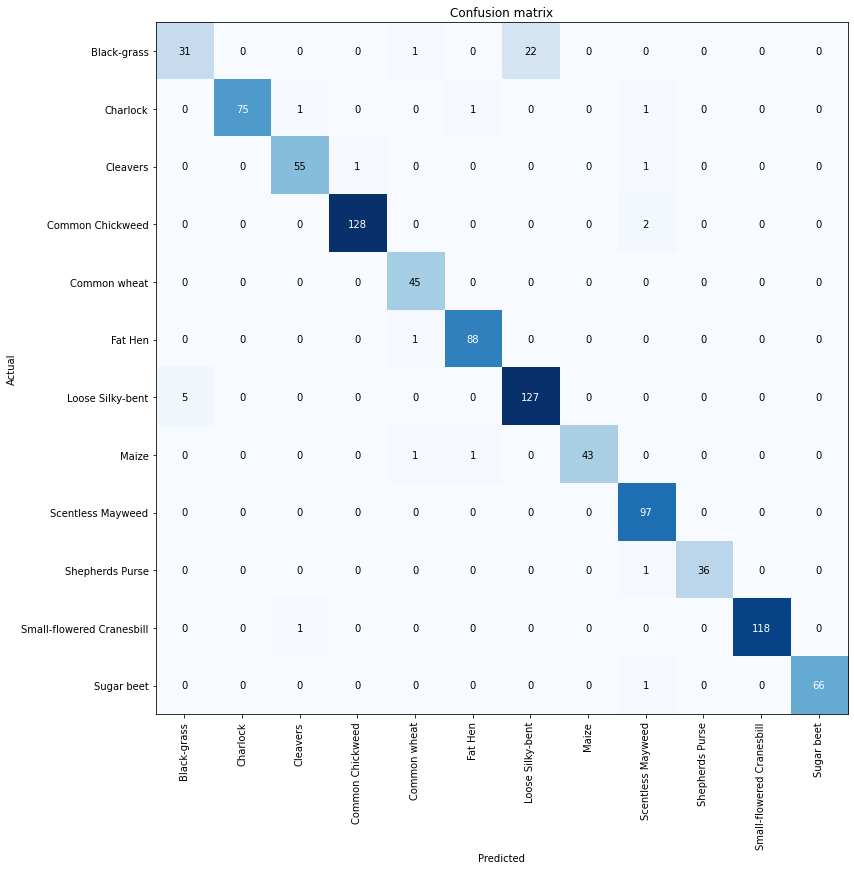

In [ ]:
interp.plot_confusion_matrix(figsize=(12, 12))